In [3]:
import pandas as pd
import numpy as np
import torch
import os
from scipy.io import loadmat
from imageio import imread
import matplotlib.pyplot as plt
import pickle
import data_utils
from torch.utils.data import Dataset

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
i = 3
imgs = os.listdir(data_utils.COAD_IMG_DIR)
current_img = data_utils.COAD_IMG_DIR+imgs[i]

In [32]:
all_slides = []
all_slide_tile_classes = []
all_slide_locs = []
all_slide_labels = []
#all_slide_names = []
counter = 0
for i,name in enumerate(imgs):
    if name[0:3] == 'img':
        print((counter,name), end=" ")
        if name == 'img76':
            continue
        else:
            counter +=1
            current_img = data_utils.COAD_IMG_DIR+name
            slide_level_label,epi_mat,fibro_mat,inf_mat,other_mat,bmp_im = data_utils.process_slide(current_img,imgs,i)
            slide,slide_tile_class,slide_locs = data_utils.read_slide(epi_mat,fibro_mat,inf_mat,other_mat,bmp_im)

            all_slides.append(slide)
            all_slide_tile_classes.append(slide_tile_class)
            all_slide_locs.append(slide_locs)
            all_slide_labels.append(slide_level_label)
            #all_slide_names.append(current_img)

(0, 'img92') (1, 'img75') (2, 'img62') (3, 'img50') (4, 'img21') (5, 'img68') (6, 'img41') (7, 'img23') (8, 'img36') (9, 'img91') (10, 'img47') (11, 'img71') (12, 'img55') (13, 'img52') (14, 'img64') (15, 'img9') (16, 'img3') (17, 'img97') (18, 'img96') (19, 'img22') (20, 'img84') (21, 'img95') (22, 'img40') (23, 'img48') (24, 'img5') (25, 'img56') (26, 'img93') (27, 'img38') (28, 'img90') (29, 'img26') (30, 'img73') (31, 'img35') (32, 'img83') (33, 'img2') (34, 'img33') (35, 'img1') (36, 'img29') (37, 'img37') (38, 'img15') (39, 'img34') (40, 'img19') (41, 'img20') (42, 'img57') (43, 'img87') (44, 'img6') (45, 'img74') (46, 'img76') (46, 'img10') (47, 'img79') (48, 'img80') (49, 'img100') (50, 'img78') (51, 'img94') (52, 'img53') (53, 'img69') (54, 'img54') (55, 'img51') (56, 'img11') (57, 'img7') (58, 'img12') (59, 'img4') (60, 'img61') (61, 'img82') (62, 'img14') (63, 'img70') (64, 'img16') (65, 'img89') (66, 'img17') (67, 'img24') (68, 'img65') (69, 'img31') (70, 'img81') (71, 'img

In [15]:
pickle_file = data_utils.COAD_DATASET
with open(pickle_file, 'wb') as f: 
        pickle.dump([all_slides, all_slide_tile_classes, all_slide_locs, all_slide_labels], f)

idxs = np.random.permutation(len(all_slides))
idxs_train = idxs[50:]
idxs_val = idxs[:50]

all_slides_train = [all_slides[idx] for idx in idxs_train]
all_slide_tile_classes_train = [all_slide_tile_classes[idx] for idx in idxs_train]
all_slide_locs_train = [all_slide_locs[idx] for idx in idxs_train]
all_slide_labels_train = [all_slide_labels[idx] for idx in idxs_train]

all_slides_val = [all_slides[idx] for idx in idxs_val]
all_slide_tile_classes_val = [all_slide_tile_classes[idx] for idx in idxs_val]
all_slide_locs_val = [all_slide_locs[idx] for idx in idxs_val]
all_slide_labels_val = [all_slide_labels[idx] for idx in idxs_val]

pickle_file = data_utils.COAD_TRAIN
with open(pickle_file, 'wb') as f: 
        pickle.dump([all_slides_train, all_slide_tile_classes_train, all_slide_locs_train, all_slide_labels_train], f)

pickle_file = data_utils.COAD_VALID
with open(pickle_file, 'wb') as f: 
        pickle.dump([all_slides_val, all_slide_tile_classes_val, all_slide_locs_val, all_slide_labels_val], f)

pickle_file = data_utils.COAD_DEV
with open(pickle_file, 'wb') as f: 
        pickle.dump([all_slides[:10], all_slide_tile_classes[:10], all_slide_locs[:10], all_slide_labels[:10]], f)

# dataset too small
#pickle_file = data_utils.COAD_TEST
#with open(pickle_file, 'wb') as f: 
#        pickle.dump([all_slides[90:], all_slide_tile_classes[90:], all_slide_locs[90:],all_slide_labels[90:]], f)

In [ ]:
dev = data_utils.COAD_dataset(data_utils.COAD_DEV)

In [ ]:
dev_loader = torch.utils.data.DataLoader(dev, batch_size=1, shuffle=True, pin_memory=True)

In [34]:
list(idxs_val).index(50)

35

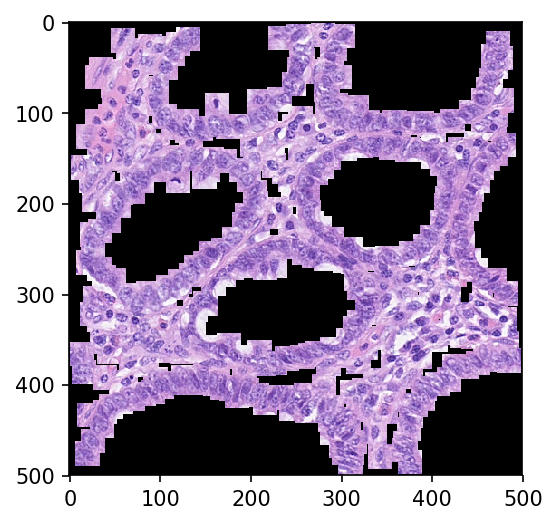

In [33]:
slide = all_slides[50]
image = np.zeros([500,500,3])
locs = all_slide_locs[50]

for i,tile in enumerate(slide.squeeze(0)):    
    image[locs[i][1]-13:locs[i][1]+14,locs[i][0]-13:locs[i][0]+14] = tile.numpy().reshape(27,27,3)#*255.0*((a_np[i]-a_min)/(a_max - a_min))
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
plt.imshow(image)
fig.set_dpi(150)